In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
import pymc as pm
print(f"Running on PyMC v{pm.__version__}") 
import arviz as az

Running on PyMC v5.8.0


## Ex4. Hierarchical model... Insect lay eggs

Example 4.

How many eggs ($N$) does an insect lay? And, what is the probability of successful hatching?

Likelihood:

\begin{align*}
      Y_i \mid N, p &\sim \text{Binomial}(N, p)  
\end{align*} 

Prior:
\begin{align*}
      N \mid \lambda &\sim \text{Poisson}(\lambda = 100) \\
      p \mid \alpha, \beta  &\sim \text{Beta}(\alpha =3 , \beta=3) 
\end{align*}


Suppose the observed data are $y_i = 113, 137, 150, 125, 171,  164$

- $Y_i$ : number of observed successful hatching.  $i=1,...,6$ 
- $p$ : probability of successful hatching.
- $N$ : total number of laid eggs.

In [5]:
Y_data=[113, 137, 150, 125, 171,  164] 

In [6]:
with pm.Model() as m_insect: 
    #prior##100 is too bad,  try to set initual value N:180-200
    N = pm.Poisson("N", mu=100) #mu=lambda_poisson=100 #Metropolis()
    p = pm.Beta('p', alpha=3, beta=3) 
    #likelihood
    y = pm.Binomial('y', n=N, p=p, observed=Y_data)

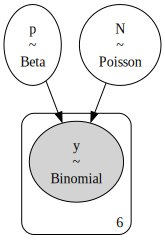

In [7]:
pm.model_to_graphviz(model=m_insect)

In [8]:
gv = pm.model_graph.model_to_graphviz(model=m_insect)
gv.format = 'png'
gv.render(filename='ex_4_insect')

'ex_4_insect.png'

In [ ]:
with m_insect: 
    idata_insect = pm.sample(1000)

It's too bad to set mu=100 for the poisson distribution. The program gives <font color=#dc143c>SamplingError</font> information due to Starting values.
If you still insist on setting this prior information, try to put your <font color=#dc143c>initial values</font>.

In [9]:
#Set initial values before sampling
inits = { "N": np.array(200), 
          "p": np.array(0.75)
}

with m_insect: 
    idata_insect = pm.sample(1000, initvals=inits, random_seed=101)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [N]
>NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [10]:
az.summary(idata_insect, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
N,190.368,4.790,180.000,199.000,0.312,0.221,236.0,413.0,1.03
p,0.752,0.023,0.706,0.796,0.001,0.001,269.0,660.0,1.02


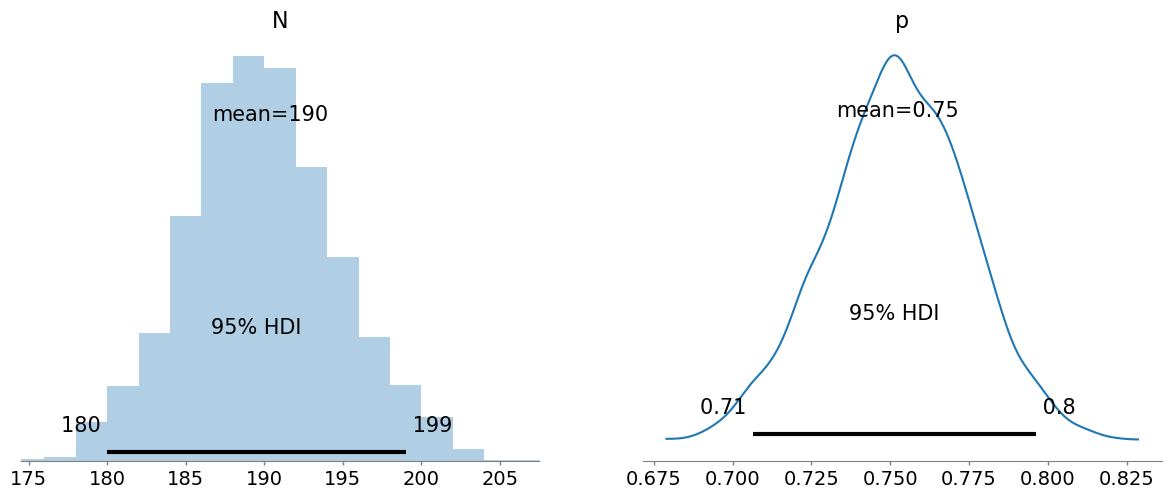

In [11]:
az.plot_posterior(idata_insect, hdi_prob=0.95,  round_to=2)
plt.show()

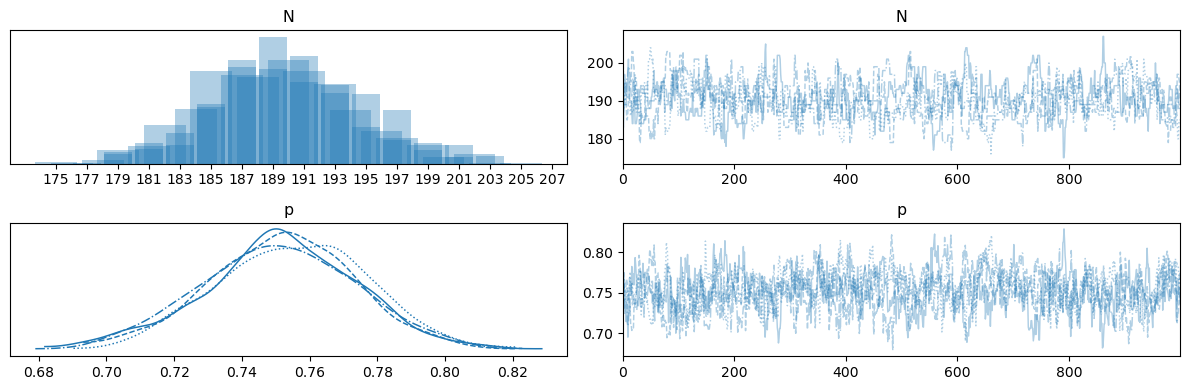

In [12]:
az.plot_trace(idata_insect,compact=True )
plt.tight_layout()